## Getting Rid of Field Stars

-----------------
Author: Erin Motherway
Date: 7/6/2022

This notebook reads in a phot file, plots a CMD, and allows for the elimination of stars under a chosen cuttoff line. 

In [1]:
#import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#read in phot file
photData = pd.read_csv('NGC6819.phot',delim_whitespace=True)
df = pd.DataFrame(photData)
display(df)

id        G     G_BP     G_RP     g_ps     r_ps     i_ps  \
0     100300001   9.9643  11.6368   8.7188  12.0640  11.9650  10.1610   
1     108590002  10.0908  11.4559   8.9425  13.2814  10.9032   9.0598   
2     109170003  10.1428  11.4292   9.0287  99.9000  99.9000  99.9000   
3     111330004  10.9064  11.7692  10.0000  99.9000  99.9000  99.9000   
4     100210005  11.0790  11.9665  10.1455  99.9000  99.9000  99.9000   
...         ...      ...      ...      ...      ...      ...      ...   
2574  122902575  20.8676  21.3298  20.2808  21.5337  20.9281  20.6569   
2575  115172576  20.8750  21.2513  20.5470  21.4135  20.8601  20.6260   
2576  116032577  20.8903  21.1500  20.2660  21.4914  20.6895  20.4278   
2577  113862578  20.8937  20.8228  19.8898  22.1363  20.9247  20.4499   
2578  110212579  20.9009  21.0214  20.2714  21.7633  20.9874  20.7245   

         z_ps     y_ps    J_2M  ...  sigz_ps  sigy_ps  sigJ_2M  sigH_2M  \
0      9.0880   8.5260   6.758  ...  -9.9000  -9.9000    0.020    0.018   
1      8.5864   8.8477   7.240  ...   0.0100   0.1720    0.023    0.017   
2     99.9000  99.9000   7.356  ...  -9.9000  -9.9000    0.023    0.026   
3     99.9000  99.9000   8.723  ...  -9.9000  -9.9000    0.023    0.031   
4     99.9000  99.9000   8.819  ...  -9.9000  -9.9000    0.023    0.015   
...       ...      ...     ...  ...      ...      ...      ...      ...   
2574  20.4802  20.2391  99.900  ...   0.0315   0.3061   -9.900   -9.900   
2575  20.5151  20.1972  99.900  ...   0.2331   0.1430   -9.900   -9.900   
2576  20.3339  19.9900  99.900  ...   0.0701   0.0737   -9.900   -9.900   
2577  20.0596  19.7728  99.900  ...   0.0609   0.0583   -9.900   -9.900   
2578  20.4267  99.9000  99.900  ...   0.0387  -9.9000   -9.900   -9.900   

      sigKs_2M  mass1  massRatio  stage1  CMprior  useDBI  
0        0.021    0.0        0.0       1    0.013       1  
1        0.018    0.0        0.0       1    0.014       1  
2        0.016    0.0        0.0       1    0.025       1  
3        0.018    0.0        0.0       1    0.033       1  
4        0.018    0.0        0.0       1    0.022       1  
...        ...    ...        ...     ...      ...     ...  
2574    -9.900    0.0        0.0       1    0.085       1  
2575    -9.900    0.0        0.0       1    0.008       1  
2576    -9.900    0.0        0.0       1    0.408       1  
2577    -9.900    0.0        0.0       1    0.034       1  
2578    -9.900    0.0        0.0       1    0.735       1  

[2579 rows x 28 columns]

In [3]:
# plot CMD 
f, ax = plt.subplots(figsize=(16,20))
ax.plot(df['g_ps']-df['i_ps'],df['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)

#plot cuttoff line by guessing x and y values
x1=0.6
x2=2
y1=17.75
y2=22
ax.plot((x1, x2),(y1,y2),color='k',linewidth=3)


In [ ]:
def function(input: float, input2: int):
    variable = input/input2
    


In [4]:
# print slope and intercept
m = (y2-y1)/(x2-x1)

print('The slope value for this line is',m)

b = y1 - m*x1

print('The intercept for this line is',b)


The slope value for this line is 3.035714285714286
The intercept for this line is 15.928571428571429


In [5]:
f, ax = plt.subplots(figsize=(16,20))
df2 = df[((m* (df['g_ps']-df['i_ps']) ) + b > df['g_ps'])]
ax.plot(df2['g_ps']-df2['i_ps'], df2['g_ps'], '.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)
df2

id        G     G_BP     G_RP     g_ps     r_ps     i_ps  \
0     100300001   9.9643  11.6368   8.7188  12.0640  11.9650  10.1610   
1     108590002  10.0908  11.4559   8.9425  13.2814  10.9032   9.0598   
9     100630010  12.4083  13.0179  11.6579  13.3022  12.9060  12.3800   
10    107740011  12.4564  13.1231  11.6733  13.3640  12.7440  12.2500   
14    100330015  12.5173  13.1115  11.7863  13.3066  12.6870  12.2810   
...         ...      ...      ...      ...      ...      ...      ...   
2543  121982544  20.7874  21.0804  19.5213  99.9000  20.7890  20.0301   
2551  120592552  20.8014  21.3704  19.8603  99.9000  20.8465  20.1611   
2555  121392556  20.8064  20.9309  20.1058  99.9000  99.9000  20.4512   
2564  123902565  20.8359  21.4763  19.9433  99.9000  99.9000  19.9558   
2566  109702567  20.8434  21.4688  19.6774  22.2853  21.1077  20.0772   

         z_ps     y_ps    J_2M  ...  sigz_ps  sigy_ps  sigJ_2M  sigH_2M  \
0      9.0880   8.5260   6.758  ...  -9.9000  -9.9000    0.020    0.018   
1      8.5864   8.8477   7.240  ...   0.0100   0.1720    0.023    0.017   
9     12.0310  11.8690  10.660  ...  -9.9000  -9.9000    0.038    0.040   
10    11.9300  11.7740  10.589  ...  -9.9000  -9.9000    0.021    0.019   
14    12.0270  11.9090  10.790  ...  -9.9000  -9.9000    0.021    0.023   
...       ...      ...     ...  ...      ...      ...      ...      ...   
2543  19.7208  19.4754  99.900  ...   0.0141   0.0280   -9.900   -9.900   
2551  19.8219  19.5825  99.900  ...   0.0378   0.0316   -9.900   -9.900   
2555  19.9766  19.7743  99.900  ...   0.1447   0.0386   -9.900   -9.900   
2564  99.9000  99.9000  99.900  ...  -9.9000  -9.9000   -9.900   -9.900   
2566  19.6320  19.3004  99.900  ...   0.0457   0.0283   -9.900   -9.900   

      sigKs_2M  mass1  massRatio  stage1  CMprior  useDBI  
0        0.021    0.0        0.0       1    0.013       1  
1        0.018    0.0        0.0       1    0.014       1  
9        0.032    0.0        0.0       1    0.007       1  
10       0.018    0.0        0.0       1    0.023       1  
14       0.035    0.0        0.0       1    0.038       1  
...        ...    ...        ...     ...      ...     ...  
2543    -9.900    0.0        0.0       1    0.042       1  
2551    -9.900    0.0        0.0       1    0.026       1  
2555    -9.900    0.0        0.0       1    0.292       1  
2564    -9.900    0.0        0.0       1    0.027       1  
2566    -9.900    0.0        0.0       1    0.630       1  

[1301 rows x 28 columns]

In [6]:
#copy this onto command line in gitbash with changed m and b values
#cat M35.phot | awk '{if (NR == 1 || $5 < m*($5 - $7) + b) print $0}' > M35.new.phot

In [7]:
#read in new phot file
newPhotData = pd.read_csv('NGC6819.new.phot',delim_whitespace=True)
df2 = pd.DataFrame(newPhotData)

Text(0, 0.5, 'g_ps')

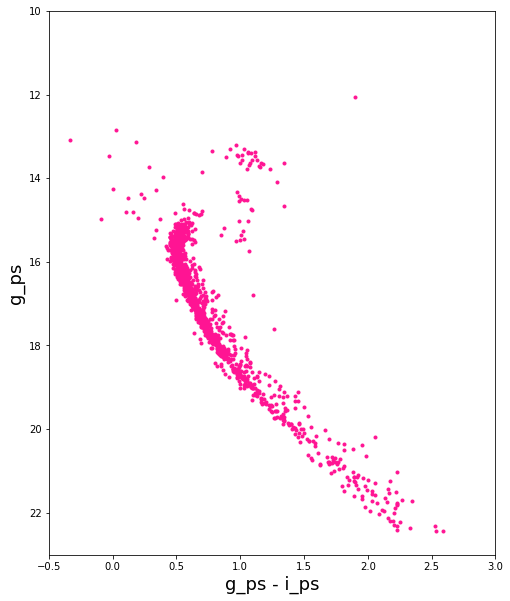

In [8]:
#plot new CMD
f, ax = plt.subplots(figsize=(8,10))
ax.plot(df2['g_ps']-df2['i_ps'],df2['g_ps'],'.',color='deeppink')
ax.set_xlim(-0.5,3)
ax.set_ylim(23,10)
ax.set_xlabel('g_ps - i_ps',fontsize=18)
ax.set_ylabel('g_ps',fontsize=18)